# Multiple Linear Regression using SciKit-Learn
----   
In this tutorial, we learn how to fit a multiple linear regression model using the SciKit-Learn library. For a quick introduction to multiple linear regression, check out [this video](https://www.youtube.com/watch?v=1hbCJyM9ccs).   
   
Here our model is:   

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$   
   
In this case, $Y$ is the reponse variable which depends on the $p$ predictor variables.

$\beta_0$ is the intercept. This can be interpreted as the value of $Y$ when all predictor variables are equal to zero.

$\beta_j$ is the average effect on $Y$ of a one unit increase in $X_j$.

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [3]:
df.shape

(120, 20)

Here, we see that the DataFrame contains multiple columns. We are interested in the outcome of the Rand/Dollar exchange rate variable, and would like to see if we can predict the response of this variable using the other variables as predictors.

## Variable Selection
We have 19 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between all variables in our DataFrame.

In [4]:
df.corr()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
ZAR/USD,1.000000,-0.335780,0.784756,-0.350606,0.791994,0.308049,0.855311,0.317203,-0.727278,-0.472230,-0.056806,-0.030787,0.034169,0.041555,-0.034278,-0.056806,0.191455,0.139858,0.863282,0.872660
Value of Exports (USD),-0.335780,1.000000,0.298409,0.735534,0.112544,0.583256,-0.133469,0.587733,0.137726,-0.313378,-0.499981,-0.516783,-0.513034,-0.507888,-0.519409,-0.499981,-0.241177,-0.056806,0.086921,0.043945
Value of Exports (ZAR),0.784756,0.298409,1.000000,0.130149,0.887292,0.674501,0.790723,0.687652,-0.657928,-0.700730,-0.368687,-0.351009,-0.281080,-0.258919,-0.353812,-0.368687,0.028151,0.126683,0.936481,0.918739
Value of Imports (USD),-0.350606,0.735534,0.130149,1.000000,0.278542,0.408418,-0.283986,0.437643,0.307407,-0.211104,-0.267341,-0.301110,-0.310114,-0.300033,-0.302363,-0.267341,-0.357321,0.238790,0.002155,-0.098713
Value of Imports (ZAR),0.791994,0.112544,0.887292,0.278542,1.000000,0.575439,0.685969,0.601527,-0.558330,-0.624678,-0.247282,-0.240280,-0.180701,-0.155815,-0.243655,-0.247282,-0.064803,0.277996,0.887768,0.836289
Total Reserves excl Gold (USD),0.308049,0.583256,0.674501,0.408418,0.575439,1.000000,0.351852,0.994116,-0.361043,-0.671447,-0.864065,-0.864202,-0.825471,-0.783872,-0.862595,-0.864065,-0.377172,-0.320050,0.692428,0.663697
IMF Reserve Position (USD),0.855311,-0.133469,0.790723,-0.283986,0.685969,0.351852,1.000000,0.352131,-0.781352,-0.569152,-0.075590,-0.046479,0.043367,0.050305,-0.046767,-0.075590,0.298413,0.106508,0.846643,0.883892
Foreign Exchange (USD),0.317203,0.587733,0.687652,0.437643,0.601527,0.994116,0.352131,1.000000,-0.344510,-0.665832,-0.828095,-0.828128,-0.793410,-0.743684,-0.826767,-0.828095,-0.385478,-0.270940,0.700600,0.662314
Claims on Non-residents (USD),-0.727278,0.137726,-0.657928,0.307407,-0.558330,-0.361043,-0.781352,-0.344510,1.000000,0.698120,0.181353,0.161568,0.083407,0.078167,0.147284,0.181353,-0.252070,0.059806,-0.720358,-0.771530
Liabilities to Non-residents (USD),-0.472230,-0.313378,-0.700730,-0.211104,-0.624678,-0.671447,-0.569152,-0.665832,0.698120,1.000000,0.500934,0.497797,0.440297,0.425561,0.491300,0.500934,0.054362,0.074766,-0.701189,-0.687501


   
**Okay**, so that's quite a bit to take in!   

The matrix above is known as a correlation matrix. It shows the correlation coefficients for all variable pairs in the DataFrame.   

## Drop bad predictors
We are interested in the correlations between potential predictors and our response variable, so let's look at the values in the first column of the matrix above.   
Let's try thin the DataFrame down by removing variables with very low correlations with ZAR/USD.

In [5]:
df = df.drop(['Financial Market Prices, Equities Index',
             'Government Bonds',
             'Lending Rate',
             'Deposit Rate',
             'Savings Rate',
             'Treasury Bill Rate',
             'Money Market Rate',
             'Central Bank Policy Rate'], axis=1)

In [6]:
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,95.32,88.32


So now we have thinned our DataFrame down to a more manageable 11 possible predictors.   

## Drop correlated predictors
However, we can't just drop those predictors which have a low correlation with ZAR/USD. We also need to look for predictor variable pairs which have high correlation with eachother.   
It's quite a hassle to look through every column of the correlation matrix. Instead, we'll load up the **Seaborn** library to visualise the relationships.

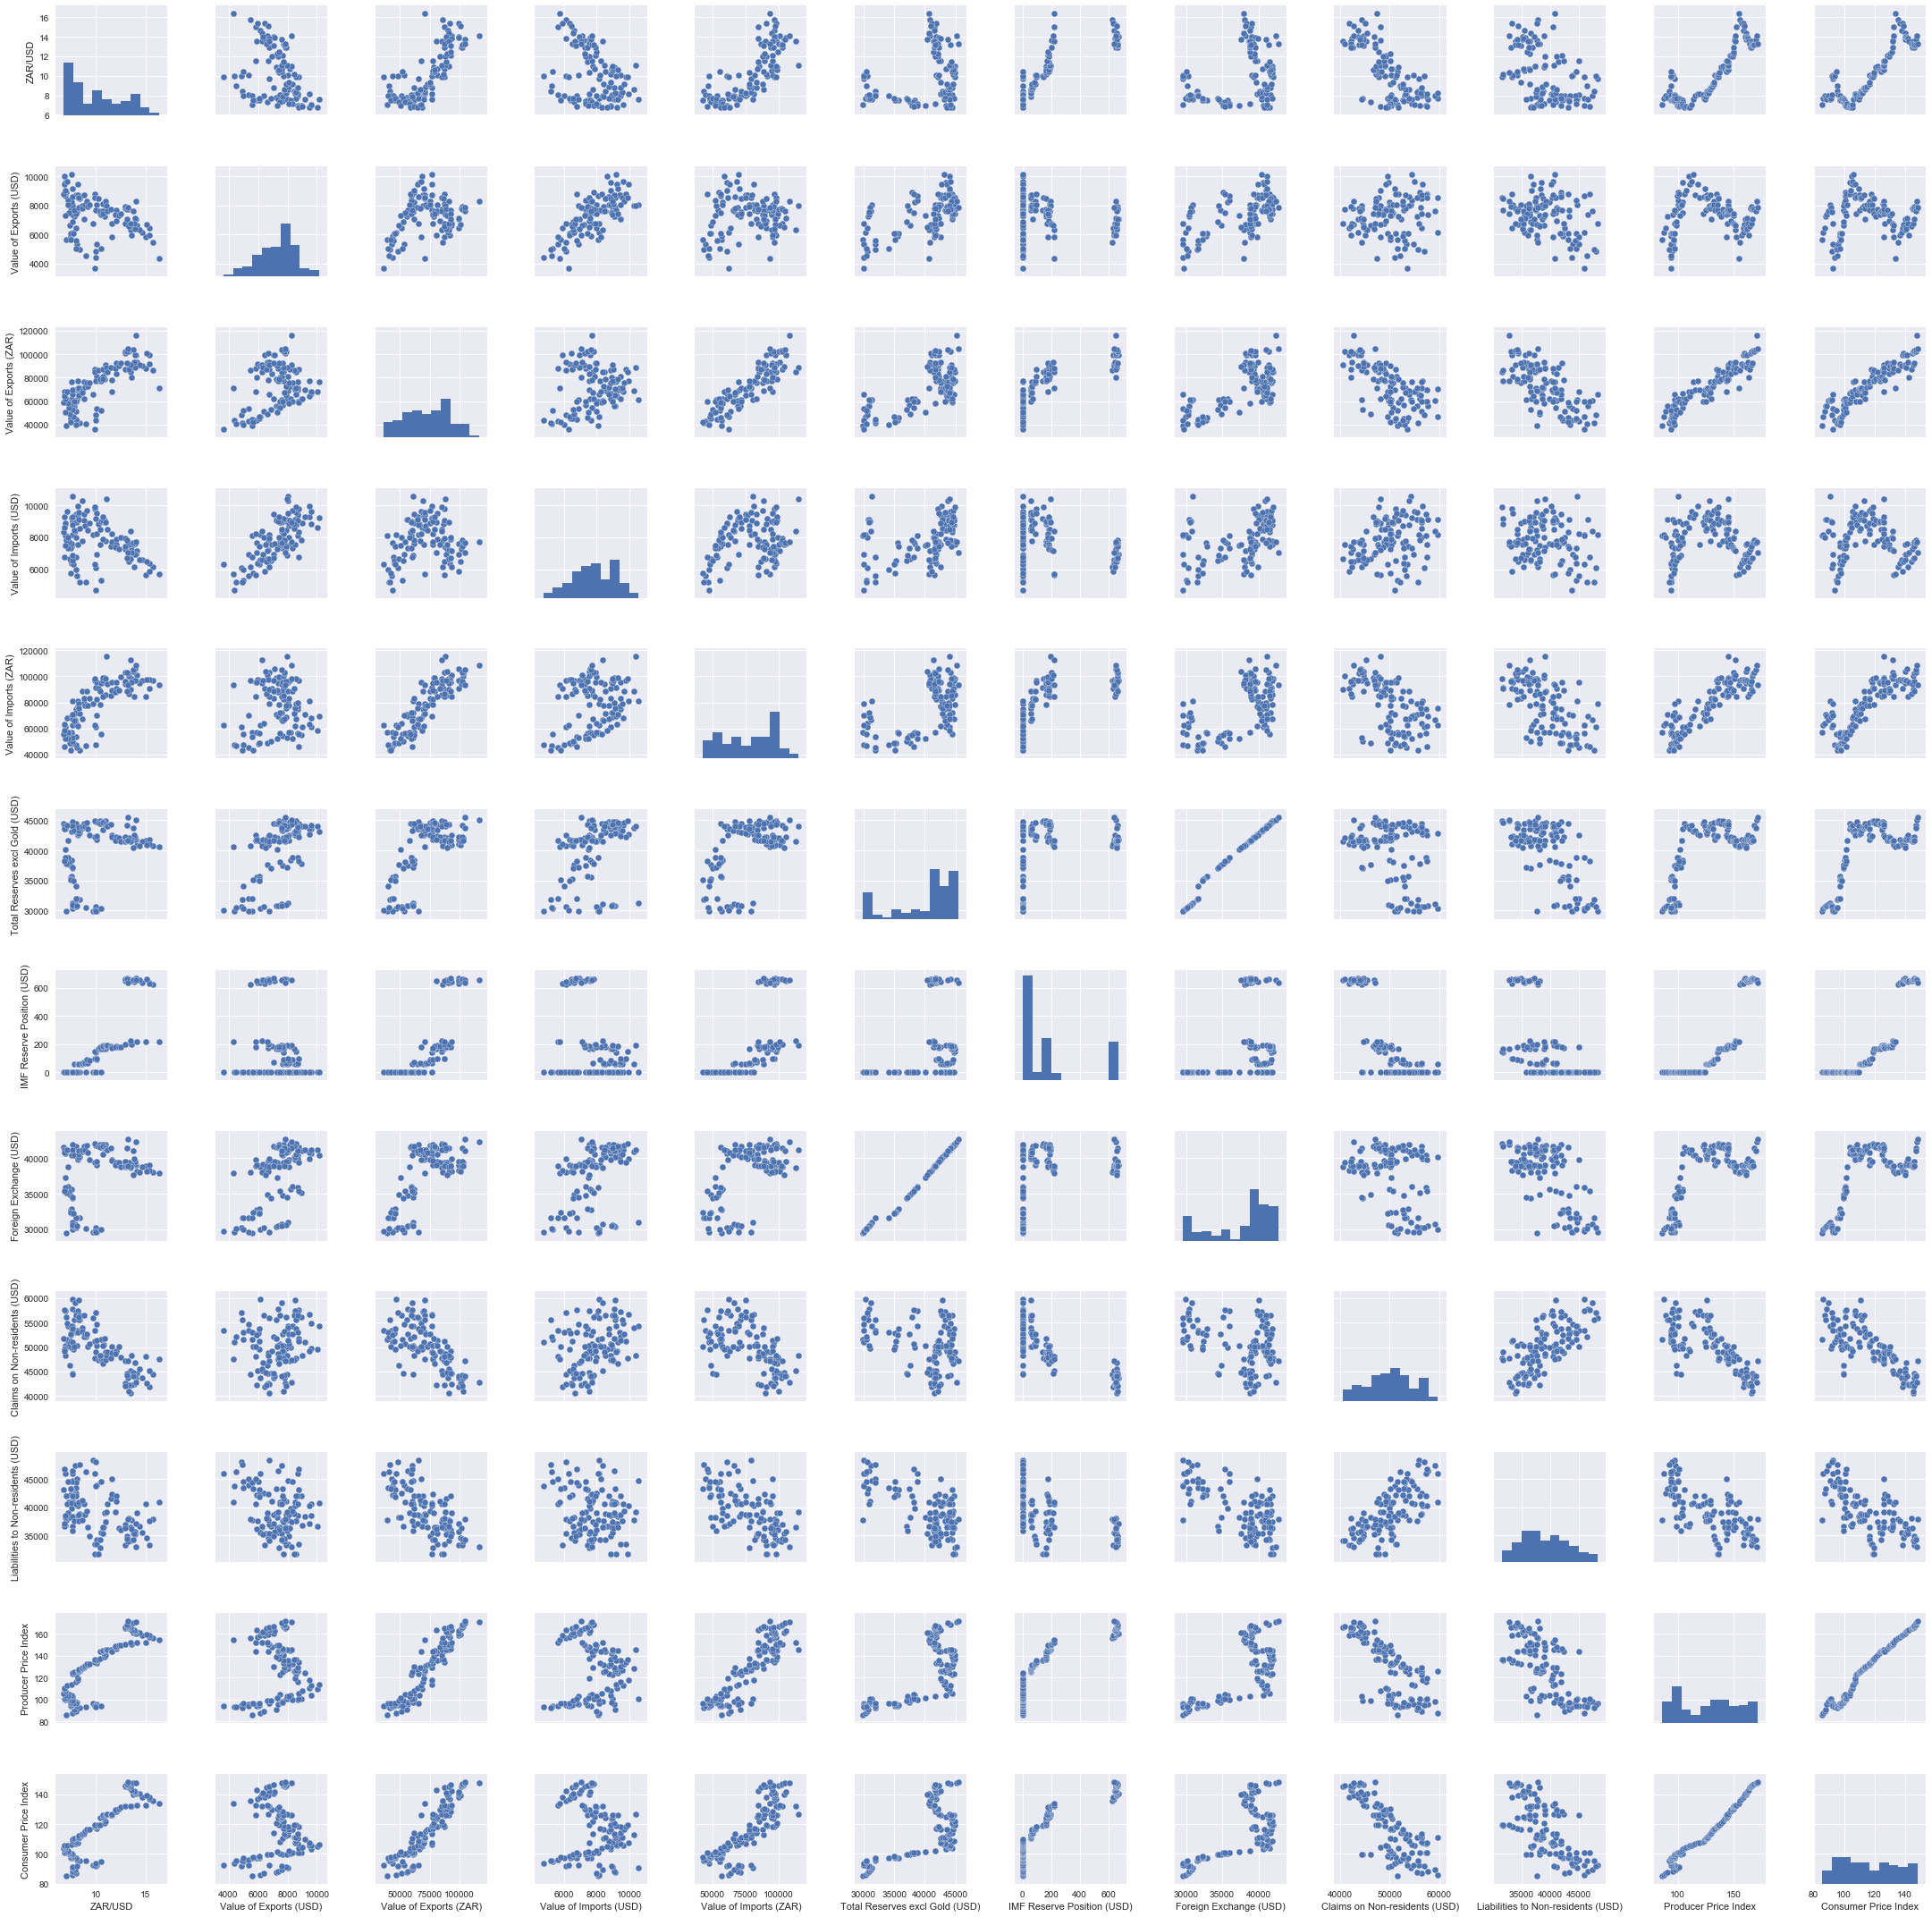

In [7]:
import seaborn as sns

sns.pairplot(df)
plt.show()

Okay, this might seem like a lot to take in again!   

We are looking for scatter plots within the pair plot which form a linear pattern.   

It looks like **Foreign Exchange** and **Total Reserves excl Gold** are highly correlated. **Producer Price Index** and **Consumer Price Index** are also highly correlated too.   

Let's plot a smaller correlation matrix using just these variables.

In [8]:
df[['Foreign Exchange (USD)',
   'Total Reserves excl Gold (USD)',
   'Consumer Price Index',
   'Producer Price Index']].corr()

,Foreign Exchange (USD),Total Reserves excl Gold (USD),Consumer Price Index,Producer Price Index
Foreign Exchange (USD),1.000000,0.994116,0.662314,0.700600
Total Reserves excl Gold (USD),0.994116,1.000000,0.663697,0.692428
Consumer Price Index,0.662314,0.663697,1.000000,0.987164
Producer Price Index,0.700600,0.692428,0.987164,1.000000


Above, we can see that we do have some highly correlated predictors!   

In each of the two correlated pairs, we'll drop the one which has the lower correlation with the ZAR/USD exchange rate.

In [9]:
df = df.drop(['Total Reserves excl Gold (USD)',
        'Producer Price Index'], axis=1)

In [10]:
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,1.92,29526.78,51547.61,37752.29,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,2.01,29943.04,59702.31,45927.67,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,2.05,30246.54,56448.18,42565.17,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,2.03,30399.21,55534.75,43342.70,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,2.10,30467.81,57682.89,46533.13,88.32


## Let's try to model the Rand exchange rate   

Now that we have thinned out our DataFrame, let's see what we can do with machine learning.   
   

In [11]:
from sklearn.linear_model import LinearRegression

X = df.drop('ZAR/USD', axis=1)
y = df['ZAR/USD']

In [12]:
lm = LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    shuffle=False)

In [15]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
b = float(lm.intercept_)

In [17]:
a = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [18]:
print("Intercept:", float(b))

Intercept:	 8.013971490035594


In [19]:
a

,Coefficient
Value of Exports (USD),-0.000707
Value of Exports (ZAR),0.000093
Value of Imports (USD),-0.000610
Value of Imports (ZAR),0.000063
IMF Reserve Position (USD),-0.003130
Foreign Exchange (USD),0.000034
Claims on Non-residents (USD),-0.000014
Liabilities to Non-residents (USD),0.000027
Consumer Price Index,-0.008873


In [20]:
from sklearn import metrics

In [21]:
train_lm = lm.predict(X_train)

print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))

MSE (train)
Linear: 0.0503704606948


In [22]:
test_lm = lm.predict(X_test)

print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))

MSE (test)
Linear: 3.24127031879


In [23]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2016M01']))

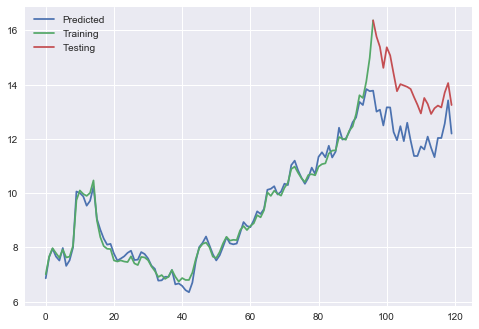

In [24]:
plt.plot(np.arange(len(y)), lm.predict(X), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()

----
**To summarise:**   
We learnt how to:
* use the seaborn and numpy libraries to perform variable selection.
* use scikit-learn to perform multiple linear regression.   

In future tutorials, we will look at methods for improved variable selection.